How many people survived?

Is there any correlation between survival, age, fare?

How many males and females were there in total?

Does the ages of males and females differ significantly?

How many males and females survived?

What was the average age of all people and also the survivors?

How many people embarked from each station?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
titanic_data = pd.read_csv('titanic_data.csv')

Populating the interactive namespace from numpy and matplotlib


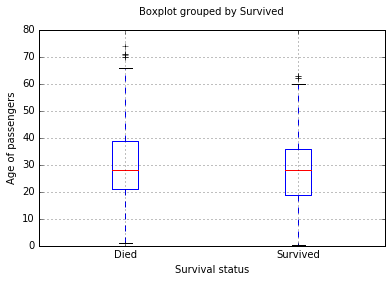

In [8]:
#Plotting Survival against and Age
titanic_data.boxplot('Age', 'Survived')
plt.xticks([1,2],['Died','Survived'])
plt.xlabel('Survival status')
plt.ylabel('Age of passengers')
plt.title('')
plt.show()

In [14]:
x1 = titanic_data['Survived']
y1 = titanic_data['Age']
correl_age_survival = y1.corr(x1)
print correl_age_survival

-0.0772210945722


From the graph and the above code we can see that there is almost no correlation between age of passenger and his/her survival.

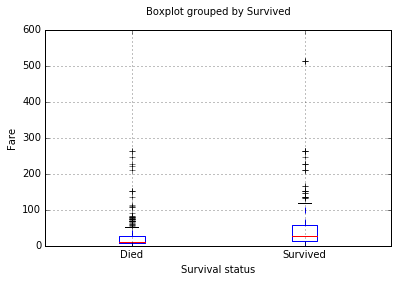

In [13]:
#Plotting Survival against Fare:
titanic_data.boxplot('Fare','Survived')
plt.xticks([1,2],['Died','Survived'])
plt.xlabel('Survival status')
plt.ylabel('Fare')
plt.title('')
plt.show()

In [12]:
y2 = titanic_data['Fare']
correl_fare_survival = x1.corr(y2)
print correl_fare_survival

0.257306522385


The passengers' ticket fare has very less correlation with his/her survival.

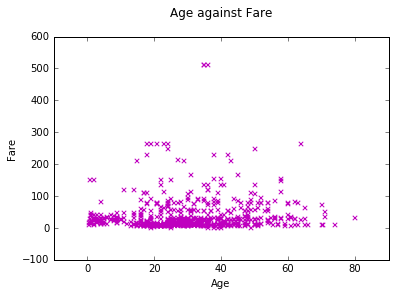

In [80]:
#Plotting Age against Fare:
plt.scatter(y1, y2, color = 'm', marker = 'x')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age against Fare\n')
plt.show()

In [81]:
correl_age_fare = y1.corr(y2)
print correl_age_fare

0.096066691769


There is very less correlation between fare of ticket and passengers' age.

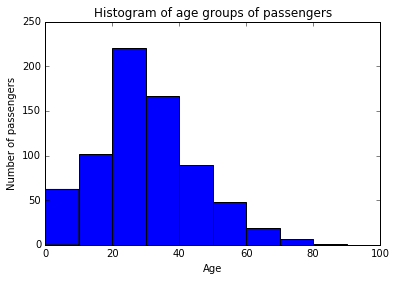

In [15]:
#Histogram for grouping passengers by Age:
#y1 has Age series
bins = [0,10,20,30,40,50,60,70,80,90,100]
plt.hist(y1,bins)
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.title('Histogram of age groups of passengers')
plt.show()

The above graph is positively skewed. So there are less passengers of high age. Most passengers are in their twenties.

In [8]:
#Total survivors
survived = titanic_data[titanic_data['Survived']==1]
print len(survived)

342


342 people survived

In [92]:
males = titanic_data[titanic_data['Sex']=='male']
print len(males)
print males['Age'].mean()
print males['Age'].std(ddof = 0)
print males['Age'].count()  # Ignores the unavailable data as opposed to len() function used earlier,
                            #thus providing the right count

577
30.7266445916
14.6619907683
453


There were 577 males in total of which 453 had age available with average age 30.72 and standard deviation of age 14.66.

In [93]:
females = titanic_data[titanic_data['Sex']=='female']
print females['Age'].mean()
print females['Age'].std(ddof = 0)
print len(females)
print females['Age'].count()   # Ignores the unavailable data as opposed to len() function used earlier,
                               #thus providing the right count

27.9157088123
14.0830895842
314
261


There were 314 females in total with 261 with available age with average age 27.915 and standard deviation of age 14.08.

--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------
Hypothesis Test 1:
mu(m) = Average age of all males

mu(f) = Average age of all females

H(null): mu(m) is equal to mu(f) i.e. the average age of all males that boarded the Titanic is equal to the average age of all females.

H(alternate): mu(m) is not equal to mu(f) i.e. the average age age of all males is not equal to the average age of all females.

We are given the population data from which we can calculate population standard deviations and population means. Therefore we will use z-test to test the hypothesis.

Given:
mu(m) = 30.72, 

stdev(m) = 14.66  (standard deviation of age of males), 

n(m) = 453  (population size of males), 

mu(f) = 27.915, 

stdev(f) = 14.083,

n(f) = 261  (population size of females)

The cell below has calculations for the Hypothesis Test 1.

In [89]:
#Calculations for Hypothesis Test 1:
pooled_std1 = (14.66**2/453 + 14.083**2/261)**0.5
z_statistic1 = (30.72-27.915)/pooled_std1
print z_statistic1

2.52475775595


This gives a p-value of 0.0059 which is less than 0.01. So we have sufficient evidence to reject the null hypothesis.
*********************************************************************************************************************************
*********************************************************************************************************************************

In [94]:
males_survived = males[males['Survived']==1]
print males_survived['Age'].mean()
print males_survived['Age'].std(ddof = 0)
print len(males_survived)
print males_survived['Age'].count()   # Ignores the unavailable data as opposed to len() function used earlier,
                                      #thus providing the right count

27.2760215054
16.4158276718
109
93


109 males survived. 93 ages available with average age 27.27 and standard deviation of age 16.415.

In [95]:
females_survived = females[females['Survived']==1]
print females_survived['Age'].mean()
print females_survived['Age'].std(ddof = 0)
print len(females_survived)
print females_survived['Age'].count()    # Ignores the unavailable data as opposed to len() function used earlier,
                                         #thus providing the right count

28.847715736
14.1390495865
233
197


233 females survived.197 ages available with average age of 28.84 and standard deviation of age 14.139.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Hypothesis Test 2:

mu(m) = Average age of all males who survived

mu(f) = Average age of all females who survived

H(null): mu(m) is equal to mu(f) i.e. the average age of all males who survived is equal to the average age of all females who survived.

H(alternate): mu(m) is not equal to mu(f) i.e. the average age age of all males who survived is not equal to the average age of all females who survived.

We are given the population data from which we can calculate population standard deviations and population means. Therefore we will use z-test to test the hypothesis.

Given:
mu(m) = 27.276, 

stdev(m) = 16.415  (standard deviation of age of males), 

n(m) = 93  (population size of males), 

mu(f) = 28.85, 

stdev(f) = 14.139,

n(f) = 197  (population size of females)

The cell below has calculations for the Hypothesis Test 2.

In [90]:
#Calculations for Hypothesis Test 2:
pooled_std2 = (16.415**2/93 + 14.139**2/197)**0.5
z_statistic2 = (27.276-28.85)/pooled_std2
print z_statistic2

-0.795790912401


The z-statistic gives a p-value of 0.2148 which is greater than 0.05. Therefore we fail to reject the null hypothesis.
********************************************************************************************************************************
********************************************************************************************************************************

In [43]:
print titanic_data.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64


Average age of all people was 29.699. 
Average number of sibling/spouse was 0.523. 
Average number of parch was 0.3815. 
Average fare was 32.204.

In [44]:
print survived.mean()

PassengerId    444.368421
Survived         1.000000
Pclass           1.950292
Age             28.343690
SibSp            0.473684
Parch            0.464912
Fare            48.395408
dtype: float64


Average age of survivors was 28.34. 
Average fare of survivors was 48.3954. 
Average number of SibSp of survivors was 0.4736. 
Average number of Parch of survivors was 0.4649.

In [45]:
print males.mean()

PassengerId    454.147314
Survived         0.188908
Pclass           2.389948
Age             30.726645
SibSp            0.429809
Parch            0.235702
Fare            25.523893
dtype: float64


Average fare of all males was 25.5238. 
Average number of SibSp of all males was 0.4298. 
Average number of Parch of all males was 0.235702.

In [48]:
print females.mean() 

PassengerId    431.028662
Survived         0.742038
Pclass           2.159236
Age             27.915709
SibSp            0.694268
Parch            0.649682
Fare            44.479818
dtype: float64


Average number of SibSp of all females was 0.6942. 
Average number of Parch of all females was 0.6496. 
Average fare of all females was 44.4798.

In [58]:
embark_groups = titanic_data.groupby('Embarked')
print embark_groups['Sex'].describe()

Embarked        
C         count      168
          unique       2
          top       male
          freq        95
Q         count       77
          unique       2
          top       male
          freq        41
S         count      644
          unique       2
          top       male
          freq       441
dtype: object


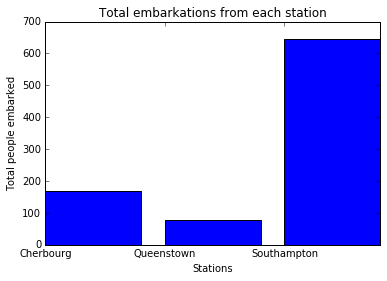

In [50]:
#Graph for total embarkations from each station
x = [0,1,2]
myxticks = ['Cherbourg','Queenstown','Southampton']
plt.xticks(x,myxticks)
y = [168,77,644]
plt.bar(x,y)
plt.title('Total embarkations from each station')
plt.xlabel('Stations')
plt.ylabel('Total people embarked')
plt.show()

Thus maximum embarkations were made from Southampton station.

In [60]:
survived_embark_group = survived.groupby('Embarked')
print survived_embark_group['PassengerId'].count()

Embarked
C     93
Q     30
S    217
Name: PassengerId, dtype: int64


In [31]:
c_ratio = 93/168.0 # Proportion of passengers survived who embarked from Cherbourg
q_ratio = 30/77.0   # Proportion of passengers survived who embarked from Queenstown
s_ratio = 217/644.0   # Proportion of passengers survived who embarked from Southampton

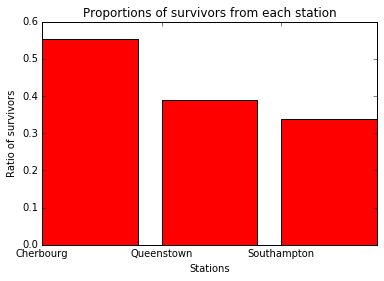

In [51]:
x = [0,1,2]
myxticks = ['Cherbourg','Queenstown','Southampton']
plt.xticks(x,myxticks)
y = [c_ratio,q_ratio,s_ratio]
plt.bar(x,y, color = 'r')
plt.title('Proportions of survivors from each station')
plt.xlabel('Stations')
plt.ylabel('Ratio of survivors')
plt.show()

Thus we can conclude that the people who survived were greater in proportion for Cherbourg.

Note: 177 values were missing in the Age column. This had an effect on both the hypothesis tests where the right count of passengers was needed. It was taken care of by using the count() function against the Age column in each dataframe as against the len() function being used on the whole of the dataframe. The count() function ignored the empty values in the column, providing the right number required. Also, since around 20% values are missing, we may have obtained a result which is not the truest depiction of the event.